In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
data=np.array([[3,6],[4,8],[2,4],[1,12]])

In [76]:
data=pd.DataFrame(data,columns=["col1","col2"])

In [77]:
data

,col1,col2
0,3,6
1,4,8
2,2,4
3,1,12


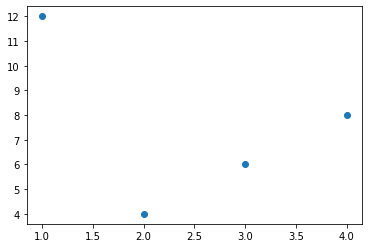

In [78]:
plt.scatter(data["col1"],data["col2"])

In [79]:
1. standarization of the data
2. cov matrix
3. eig vaulue and eig vector
4. find principle component

SyntaxError: invalid syntax (<ipython-input-79-96d79ed4993b>, line 1)

In [80]:
meanbycol=np.mean(data,axis=0)

In [81]:
meanbycol

col1    2.5
col2    7.5
dtype: float64

In [82]:
stdbycol=np.std(data,axis=0)

In [83]:
stdbycol

col1    1.118034
col2    2.958040
dtype: float64

In [84]:
scaled_by_mean=data-meanbycol

In [85]:
scaled_data=scaled_by_mean/stdbycol

In [86]:
scaled_data

,col1,col2
0,0.447214,-0.507093
1,1.341641,0.169031
2,-0.447214,-1.183216
3,-1.341641,1.521278


In [87]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [88]:
scaler.fit_transform(data)

array([[ 0.4472136 , -0.50709255],
       [ 1.34164079,  0.16903085],
       [-0.4472136 , -1.18321596],
       [-1.34164079,  1.52127766]])

In [89]:
#cov matrix
cov_mat=np.cov(scaled_data.T)

In [90]:
cov_mat

array([[ 1.33333333, -0.50395263],
       [-0.50395263,  1.33333333]])

In [91]:
from scipy.linalg import eig

In [92]:
#step-3 eig value and eigen vector

In [93]:
eig_val,eig_vec=np.linalg.eig(cov_mat)

In [94]:
eig_val

array([1.83728596, 0.8293807 ])

In [95]:
eig_vec

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [96]:
eig_vec.T.dot(scaled_data.T).T

array([[ 0.67479635, -0.04234082],
       [ 0.82916044,  1.06820616],
       [ 0.52043226, -1.15288779],
       [-2.02438905,  0.12702245]])

In [97]:
from sklearn.decomposition import PCA
pca=PCA()

In [98]:
pca.fit_transform(scaled_data)

array([[-0.67479635,  0.04234082],
       [-0.82916044, -1.06820616],
       [-0.52043226,  1.15288779],
       [ 2.02438905, -0.12702245]])

In [99]:
pd.DataFrame(data=pca.fit_transform(scaled_data),columns=["pc1","pc2"])

,pc1,pc2
0,-0.674796,0.042341
1,-0.829160,-1.068206
2,-0.520432,1.152888
3,2.024389,-0.127022


In [100]:
pca.explained_variance_ratio_

array([0.68898224, 0.31101776])

In [101]:
df=pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")

In [102]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [103]:
df=df.drop(['Id number','Type of glass'],axis=1)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [106]:
scaled_df= scaler.fit_transform(df)

In [107]:
scaled_df

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [108]:
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)

In [109]:
scaled_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [110]:
from sklearn.decomposition import PCA
pca=PCA()

In [114]:
pc_df=pd.DataFrame(pca.fit_transform(scaled_df),columns=scaled_df.columns)

In [115]:
pc_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [116]:
pc_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315


In [117]:
var=pca.explained_variance_ratio_

In [118]:
var

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [119]:
max(var)

0.2790181917945648

In [120]:
min(var)

0.00017875753590172443

In [121]:
sum(var)

0.9999999999999998

In [122]:
sorted(var,reverse=True)

[0.2790181917945648,
 0.22778579831670423,
 0.1560937771094045,
 0.1286513829198023,
 0.1015558052361563,
 0.0586261325220867,
 0.04099538259055576,
 0.007094771974823583,
 0.00017875753590172443]

In [123]:
sum(sorted(var,reverse=True)[:6])*100

95.17310878987188

In [124]:
sum(sorted(var,reverse=True)[:5])*100

89.3104955376632

In [125]:
sum(sorted(var,reverse=True)[:7])*100

99.27264704892745

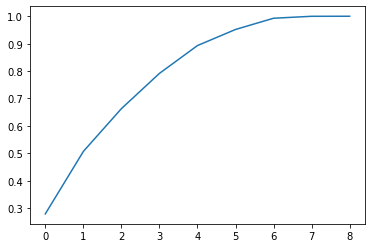

In [126]:
plt.plot(np.cumsum(var))
plt.show()

In [127]:
pca2=PCA(n_components=6)

In [128]:
pd.DataFrame(pca2.fit_transform(scaled_df),columns=["pc1","pc2","pc3","pc4","pc5","pc6"])

,pc1,pc2,pc3,pc4,pc5,pc6
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032
...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352
